# Asunciones Regresión Lineal

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import researchpy as rp
import scipy.stats as stats
from scipy.stats import levene

plt.rcParams["figure.figsize"] = (10,8) 

pd.options.display.max_columns=None
pd.options.display.float_format = '{:.2f}'.format 
np.set_printoptions(suppress=True)

In [2]:
df = pd.read_csv('../Datos/EDA_vinos.csv', index_col = 0)
df.head(2)

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,mnt_total,mnt_total_sin_vino
0,5524,1957,Graduation,Single,58138.00,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,982
1,2174,1954,Graduation,Single,46344.00,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,16


`En esta lección aprenderemos que es un ANOVA y que asunciones deben cumplirse para hacer un análisis de este tipo.`

Sin embargo, no nos podemos poner a hacer nuestras operaciones a lo loco. Antes de hacer nada, tenemos que comprobar una serie de asunciones. ¿Cuáles son?
* Los datos deben ser normales -> test de normalidad


In [ ]:
# La comprobación de la normalidad la haremos sobre la variable que nos resulta interesante: 'mntwines' (quizás más adelante hagamos el análisis con 'mntmeatproducts')

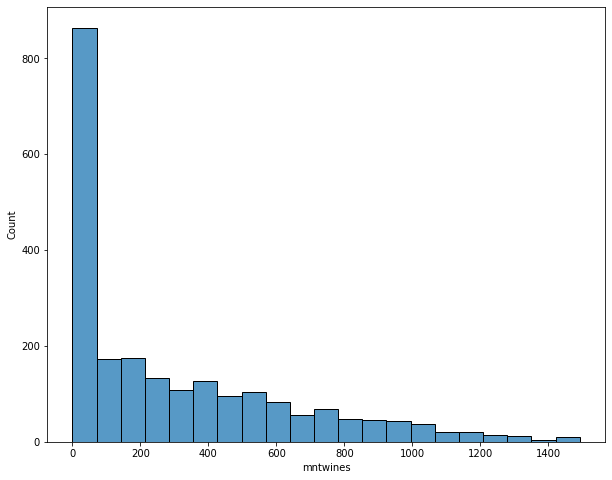

In [5]:
# Empezamos a analizarlo visualmente
sns.histplot(df['mntwines']);

In [12]:
# Aunque de forma visual interpretamos claramente que no tenemos una distribución normal, hacemos el test de shapiro para comprobar la normalidad
stats.shapiro(df['mntwines'])

ShapiroResult(statistic=0.8381438255310059, pvalue=5.7032847498020055e-43)

In [10]:
df.shape

(2240, 29)

> Nuestro p valor es menor a 0.05, por lo tanto rechazamos la hipótesis nula de que nuestra variable tiene una distribución normal

* Las variables deben ser independientes -> correlación


In [ ]:
# Como ya hemos hecho un heatmap, vamos a comporbar la independencia de forma analítica con un crosstab de chi cuadrado

In [13]:
# Sacamos una selección de columnas para analizar la independencia entre ellas
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'response', 'mnt_total',
       'mnt_total_sin_vino'],
      dtype='object')

In [14]:
lista_columnas = ['year_birth', 'education', 'marital_status', 'income', 'kidhome',
                  'teenhome', 'mntfishproducts']

In [ ]:
while i<6:
    j=0
    for i, col in enumerate(lista_columnas):
        crosstab, test_results, expected = rp.crosstab(df[col], df[lista_columnas[i+1]],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")


In [15]:
for i, col in enumerate(lista_columnas):
    print(i, '----', col)

0 ---- year_birth
1 ---- education
2 ---- marital_status
3 ---- income
4 ---- kidhome
5 ---- teenhome
6 ---- mntfishproducts


In [ ]:
crosstab, test_results, expected = rp.crosstab(df["year_birth"], df[lista_columnas[1]],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

In [ ]:
def cross_tab(id_col,field):
    col_names=['visittime_cat','week_cat','var3','var4']
    for i in col_names:
        'crosstab_{ }'.format(i)=pd.crosstab(id_col,i)


In [ ]:
crosstab, test_results, expected = rp.crosstab(df["year_birth"], df["education"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")


* Homogeneidad de las varianzas o heterocedasticidad -> test de heterocedasticidad
